In [1]:
!pip install squarify

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq 

In [3]:
orders_pre = pd.read_excel("C:\\Users\\USER\\Desktop\\Dataset_rfm.xlsx",sheet_name='Orders')
returned = pd.read_excel("C:\\Users\\USER\\Desktop\\Dataset_rfm.xlsx",sheet_name='Return')
segmentation = pd.read_excel("C:\\Users\\USER\\Desktop\\Dataset_rfm.xlsx",sheet_name='Segmentation')
product = pd.read_excel("C:\\Users\\USER\\Desktop\\Dataset_rfm.xlsx",sheet_name='Product')

# 1. Cleaning data

## 1.1. Checking

### 1.1.1. orders_pre df checking

In [4]:
orders_pre.info()
orders_pre.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Cost    9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 937.1+ KB


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926


In [5]:
# check duplicate records
orders_pre.duplicated().sum()


0

In [6]:
# Check if 'Order ID' is unique
orders_pre['Order ID'].is_unique

False

***Comment***
1. There are no duplicate records in orders_pre.
2. The Order ID' column is not unique => We have to count distinct 'Order ID' instead of count
3. We have to filter orders that were not returned.

### 1.1.2. returned df checking

In [7]:
returned.info()
returned.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999


In [8]:
# check duplicate records
returned.duplicated().sum()

0

In [9]:
# Check if 'Order ID' is unique
returned['Order ID'].is_unique

True

***Comment***
1. There are no duplicate records in returned df
2. 'Order ID' column is unique

### 1.1.3. segmentation df checking

In [10]:
segmentation.info()
segmentation.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Segment    11 non-null     object
 1   RFM Score  11 non-null     object
dtypes: object(2)
memory usage: 308.0+ bytes


,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."


In [11]:
# check duplicate records
segmentation.duplicated().sum()

0

***Comment***
1. There is no duplicate records in segmentation df
2. We have to split each RFM score into single rows

### 1.1.4. product df checking

In [12]:
product.info()
product.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Row ID        1894 non-null   int64 
 1   Product ID    1894 non-null   object
 2   Category      1894 non-null   object
 3   Sub-Category  1894 non-null   object
 4   Product Name  1894 non-null   object
dtypes: int64(1), object(4)
memory usage: 74.1+ KB


,Row ID,Product ID,Category,Sub-Category,Product Name
0,1,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,2,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,3,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,4,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,5,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


In [13]:
# check duplicate records
returned.duplicated().sum()

0

In [14]:
# Check if 'Order ID' is unique
product['Product ID'].is_unique

False

***Comment***
1. There are no duplicate records in product df
2. 'Product ID' is not unique because some products have same Product ID but have different Product Name => drop 'Product Name' then remove duplicate records so that 'Product ID' will be unique

## 1.2. Cleaning

In [15]:
# Filter orders that were not returned
orders = orders_pre.merge(returned,on='Order ID',how='left',
                          indicator=True).query('_merge=="left_only"')
orders.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Returned,_merge
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,NaN,left_only
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,NaN,left_only
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,NaN,left_only
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,NaN,left_only
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,NaN,left_only


In [16]:
# drop 'Product Name' then remove duplicate records so that 'Product ID' will be unique in product df
product.drop(['Product Name','Row ID'],axis=1,inplace=True)
product.drop_duplicates(inplace=True)
product.head()

,Product ID,Category,Sub-Category
0,FUR-BO-10001798,Furniture,Bookcases
1,FUR-CH-10000454,Furniture,Chairs
2,OFF-LA-10000240,Office Supplies,Labels
3,FUR-TA-10000577,Furniture,Tables
4,OFF-ST-10000760,Office Supplies,Storage


In [17]:
# split each RFM score into single rows in segmentation df

# rename columns
segmentation.columns = ['segment','rfm_score']         

# convert values in 'rfm_score' column into list
segmentation['rfm_score'] = segmentation['rfm_score'].str.split(',')

# split each RFM score into single rows
segmentation = segmentation.explode('rfm_score')   

# strip 'rfm_score' column
segmentation['rfm_score'] = segmentation['rfm_score'].str.strip() 

segmentation.head(5)

,segment,rfm_score
0,Champions,555
0,Champions,554
0,Champions,544
0,Champions,545
0,Champions,454


In [18]:
# check if rfm_score column is unique
segmentation['rfm_score'].is_unique

True

# 2. Assign RFM segmentation

In [19]:
# Caculate Recency, Frequency, Monetory
rfm = orders.groupby('Customer ID').agg({'Order Date':'max',
                                         'Order ID':'nunique',
                                         'Sales':'sum'}).reset_index()

rfm['Order Date'] = (pd.to_datetime('2017-12-31') - rfm['Order Date']).dt.days
rfm.columns = ['customer_id','recency','frequency','monetory']
rfm

,customer_id,recency,frequency,monetory
0,AA-10315,185,5,5563.560
1,AA-10375,20,9,1056.390
2,AA-10480,260,4,1790.512
3,AA-10645,483,5,5073.975
4,AB-10015,416,3,886.156
...,...,...,...,...
786,XP-21865,83,9,2110.726
787,YC-21895,5,4,5438.650
788,YS-21880,10,8,6720.444
789,ZC-21910,55,12,7892.998


In [20]:
# Get R, F, M score using qcut

lab_des=[5,4,3,2,1]
lab_asc=[1,2,3,4,5]

rfm['r'] = pd.qcut(rfm['recency'], q=5, labels=lab_des)
rfm['f'] = pd.qcut(rfm['frequency'], q=5, labels=lab_asc)
rfm['m'] = pd.qcut(rfm['monetory'], q=5, labels=lab_asc)

# concatenate R, F, M score into RFM score
rfm['rfm_score'] = rfm['r'].astype(str) + rfm['f'].astype(str) + rfm['m'].astype(str)

rfm.head(5)

,customer_id,recency,frequency,monetory,r,f,m,rfm_score
0,AA-10315,185,5,5563.560,2,2,5,225
1,AA-10375,20,9,1056.390,5,5,2,552
2,AA-10480,260,4,1790.512,2,1,3,213
3,AA-10645,483,5,5073.975,1,2,5,125
4,AB-10015,416,3,886.156,1,1,2,112


In [21]:
# Assign segmentation for each customer_id

cus_segmentation = rfm.merge(segmentation, on ='rfm_score', how = 'left')
cus_segmentation.head(5)

,customer_id,recency,frequency,monetory,r,f,m,rfm_score,segment
0,AA-10315,185,5,5563.560,2,2,5,225,At Risk
1,AA-10375,20,9,1056.390,5,5,2,552,Potential Loyalist
2,AA-10480,260,4,1790.512,2,1,3,213,About To Sleep
3,AA-10645,483,5,5073.975,1,2,5,125,At Risk
4,AB-10015,416,3,886.156,1,1,2,112,Lost customers


In [22]:
# Calculate number of customers share and Monetory share
segmentation_data = cus_segmentation.groupby('segment').agg(cus_count=('customer_id','count'),
                                                    avg_recency=('recency','mean'),
                                                    avg_frequency=('frequency','mean'),
                                                    sum_monetory=('monetory','sum')).round(1).reset_index()

segmentation_data['cus_share'] = (segmentation_data['cus_count']*100/segmentation_data['cus_count'].sum()).round(2)
segmentation_data['monetory_share'] = (segmentation_data['sum_monetory']*100/segmentation_data['sum_monetory'].sum()).round(2)

segmentation_data.sort_values(by='cus_count',inplace=True)

# 3. Visualization & Insights

In [23]:
# Set color palette
color1= sns.color_palette('GnBu',11)
color2= sns.color_palette('RdBu_r',11)

## 3.1. Visualize Recency, Frequency, Monetory and Number of Customers by segments

### 3.1.1. Visualize Average Recency by RFM segments

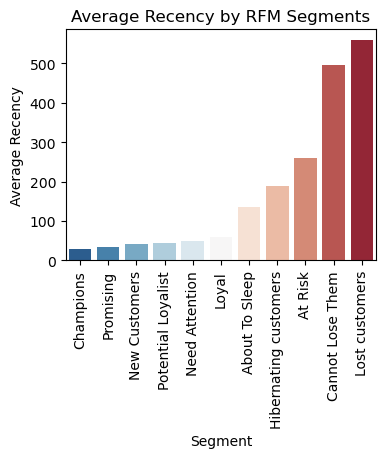

In [53]:
fig, ax = plt.subplots(1, figsize = (4,3))
r_chart = sns.barplot(x='segment',
            y='avg_recency',
            data=segmentation_data.sort_values('avg_recency'),
            palette=color2)
r_chart.set_title('Average Recency by RFM Segments')
r_chart.set(xlabel='Segment',
            ylabel='Average Recency')
plt.xticks(rotation=90)
plt.show()

***Comment:***
- Segments with the most recent purchase date: Champions (28.5 days), Promises (35.3 days) and New Customers (41.5 days)
- Segments that have not returned to buy for a long time: Lost customers (558 days) and Cannot Lose Them (496.5 days)

### 3.1.2. Visualize Average Frequency by RFM segments

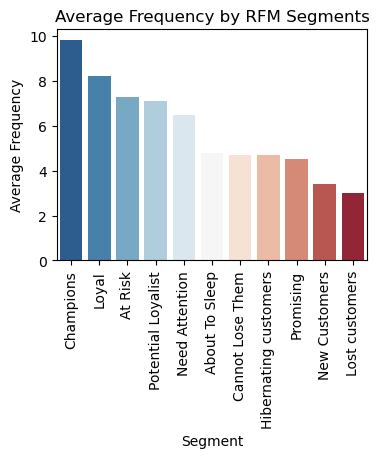

In [54]:
fig, ax = plt.subplots(1, figsize = (4,3))
f_chart =sns.barplot(x='segment',
            y='avg_frequency',
            data=segmentation_data.sort_values('avg_frequency',ascending=False),
            palette=color2)
f_chart.set_title('Average Frequency by RFM Segments')
f_chart.set(xlabel='Segment',
            ylabel='Average Frequency')
plt.xticks(rotation=90)
plt.show()

***Comment:***
- Most frequent purchase segments: Champions (9.8x), Loyal (8.2x), At Risk (7.3x)
- Segments with the lowest number of orders: Lost customers (3.0 times), New Customers (3.4 times)
- The number of orders of the Champions segment is 3.3 times higher than that of the Lost customers segment

### 3.1.3. Visualize total sales by segments

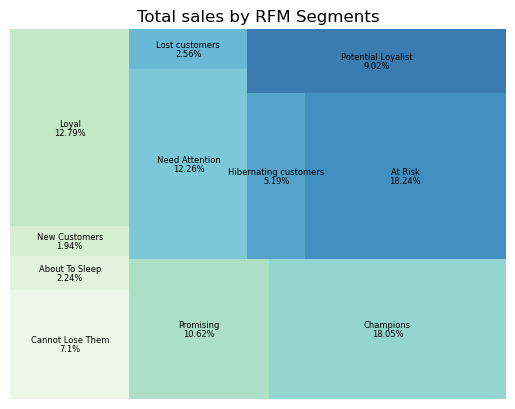

In [56]:

sales_map = sq.plot(sizes=segmentation_data['monetory_share'], 
                    label=segmentation_data['segment'],
                    color=color1,
                    alpha=.8,
                    text_kwargs={'fontsize':6},
                    value=[f'{x}%' for x in segmentation_data['monetory_share']])
plt.title('Total sales by RFM Segments')
plt.axis("off")
plt.show()

***Comment***
- Segments with the highest total revenue: At Risk (385996.9 dollars, equivalent to 18.24%) and Champions (382096.6 dollars, equivalent to 18.05%) 
- Segments with low total revenue: New Customers (40997.1 dollars, equivalent to 1.94%), About To Sleep (47310.1 dollars, equivalent to 2.24%) 
- The revenue of the At Risk segment is 9.4 times that of the New Customers segment.

### 3.1.3. Visualize Number of customers by segments

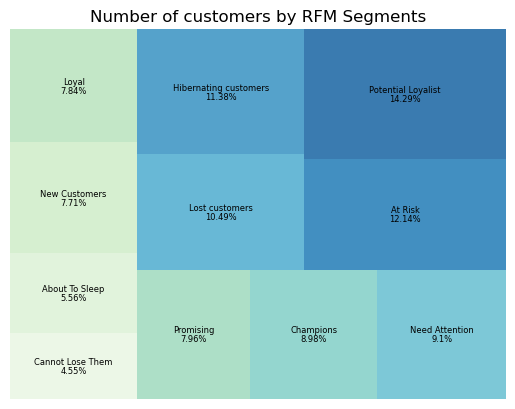

In [27]:
# Visualize Customer count by segments
count_map = sq.plot(sizes=segmentation_data['cus_count'], 
                    label=segmentation_data['segment'],
                    color=color1,
                    alpha=.8,
                    text_kwargs={'fontsize':6},
                    value=[f'{x}%' for x in segmentation_data['cus_share']])
plt.title('Number of customers by RFM Segments')
plt.axis("off")
plt.show()

### 3.1.4. Describe Recency, Frequency and Monetory

In [28]:
rfm_discribe = cus_segmentation[['recency','frequency','monetory']]
rfm_discribe.describe()

,recency,frequency,monetory
count,791.000000,791.000000,791.000000
mean,166.073325,5.958281,2675.975452
std,209.322178,2.476631,2513.579432
min,1.000000,1.000000,4.833000
25%,35.000000,4.000000,1042.041500
50%,83.000000,6.000000,2070.779000
75%,201.500000,7.000000,3553.088000
max,1320.000000,17.000000,24516.600000


### 3.1.5. Insights and recommendations

***1. Recency, Frequency and Monetory value of Superstore:***
- As a retailer, Superstore may prioritize Recency and Frequency over their Monetary since their most loyal shoppers may make many purchases throughout the year at lower Average Transaction Sizes. However, Superstore's Recency and Frequency do not have many positive signs
- Mean of Frequency is 6 times, which is low for a retail company. This means customer loyalty is not high
- Mean of Recency ~ 166 days, while the median is 83 days, this represents a lot of high Recency values. The larger this index, the higher the customer's tendency to leave.

=> Those are some warnings for Superstore to focus more on Recency and Frequency performance.

***2. Segments of Superstore:***
- 2 segments with the highest proportion of customers are Potential Loyalist (14.29%) and At Risk (12.14%)
- Negative segments such as Hibernating and Lost accounted for a high proportion of customers, 11.38% and 10.49%, respectively. However, these two groups account for less than 8% of revenue
- The two most positive segments account for less than 17% of the proportion of customers (Champions, 8.98%, and Loyal, 7.84%).
- Potential Loyalist (the ideal segment) has the highest proportion of customers (14.29%), but its revenue proportion is only 9.02%. Meanwhile, the negative segment, At Risk, accounts for 18.24% of revenue

⇒ In this Christmas - New Year marketing campaign, SuperStore needs to prioritize their efforts to promote the Potential Loyalist group to become Loyal and Champions, and find ways to reconnect with customers in the At Risk group.


***Actionable Tip for each segment***
|Customer Segment         | Activity           | Actionable Tip   |
|:-------------|:-------------|:------|
|Champions   | Bought recently, buy often, and spend the most!|Reward them. Can be early adopters for new products. Will promote your brand. |
|Loyal Customers    | Spend good money with us often. Responsive to promotions.      |   Upsell higher-value products. Ask for reviews. Engage them|
| Potential Loyalist |Recent customers, but spent a good amount and bought more than once    |Offer membership/loyalty program, and recommend other products.|
|Recent Customers |Bought most recently, but not often| Provide onboarding support, give them early success, and start building relationships|
|Promising | Recent shoppers, but haven’t spent much|Create brand awareness, and offer free trials|
| Needing Attention| Above average recency, frequency, and monetary values. May not have bought it very recently though|Make limitedtime offers, and recommend based on past purchases. Reactivate them
| About To Sleep| Below average recency, frequency, and monetary values. Will lose them if not reactivated|Share valuable resources, recommend popular products/renewals at discounts, and reconnect with them |
| At Risk|Spent big money and purchased often. But a long time ago. Need to bring them back!|Send personalized emails to reconnect, offer renewals, and provide helpful resources|
|Can’t Lose Them|Made biggest purchases, and often. But haven’t returned for a long time|Win them back via renewals or newer products, don’t lose them to competition, talk to them |
| Hibernating|Last purchase was long back, with low spenders and a low number of orders |Offer other relevant products and special discounts. Recreate brand value |
| Lost|Lowest recency, frequency, and monetary scores|Revive interest with reach-out campaign, ignore otherwise. |




## 3.2. Potential Loyalist and At Risk analysis

In [29]:
# Merge orders_pre, product, returned, cus_seg df into a full-information df
data = orders_pre.merge(product, on='Product ID', how='left')\
                 .merge(returned,on='Order ID',how='left')\
                 .merge(cus_segmentation[['customer_id','segment']],left_on='Customer ID',right_on='customer_id',how='left')

# Create order year column
data['year']=data['Order Date'].dt.strftime("%Y")

data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Category,Sub-Category,Returned,customer_id,segment,year
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,Office Supplies,Appliances,NaN,CC-12430,Loyal,2017
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,Furniture,Bookcases,NaN,PO-18865,Need Attention,2017
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,Technology,Phones,NaN,PO-18865,Need Attention,2017
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,Office Supplies,Binders,NaN,PO-18865,Need Attention,2017
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926,Office Supplies,Binders,Yes,EB-13975,Cannot Lose Them,2017


### 3.2.1 Potential Loyalist

In [30]:
# Filter successful transactions of Potential Loyalist
potential = data.query('segment=="Potential Loyalist" and Returned!="Yes"')
potential.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Category,Sub-Category,Returned,customer_id,segment,year
10,4240,CA-2017-158673,2017-12-29,2018-01-04,Standard Class,KB-16600,Corporate,49505,OFF-PA-10000994,209.700,2,54.5220,Office Supplies,Paper,NaN,KB-16600,Potential Loyalist,2017
20,571,CA-2017-164826,2017-12-28,2018-01-04,Standard Class,JF-15415,Consumer,10024,OFF-LA-10001297,72.450,7,5.3820,Office Supplies,Labels,NaN,JF-15415,Potential Loyalist,2017
21,572,CA-2017-164826,2017-12-28,2018-01-04,Standard Class,JF-15415,Consumer,10024,OFF-FA-10000585,13.960,4,1.8846,Office Supplies,Fasteners,NaN,JF-15415,Potential Loyalist,2017
22,573,CA-2017-164826,2017-12-28,2018-01-04,Standard Class,JF-15415,Consumer,10024,OFF-BI-10001922,33.264,7,3.1482,Office Supplies,Binders,NaN,JF-15415,Potential Loyalist,2017
23,574,CA-2017-164826,2017-12-28,2018-01-04,Standard Class,JF-15415,Consumer,10024,TEC-PH-10000347,14.850,3,3.6135,Technology,Phones,NaN,JF-15415,Potential Loyalist,2017


#### 3.2.1.a. Analysis and insights

In [31]:
# Calculate orders count, sales by year
p_ord=potential.groupby('year').agg(ord_count=('Order ID','nunique'),
                               sales=('Sales','sum')).reset_index()

# cart value by year
p_ord['cart_value']= p_ord['sales']/p_ord['ord_count']

# Calculate percentage change over years
p_ord['count_yoy']=p_ord['ord_count'].pct_change().round(4)*100
p_ord['sales_yoy']=p_ord['sales'].pct_change().round(4)*100
p_ord['cart_yoy']=p_ord['cart_value'].pct_change().round(4)*100
p_ord.sort_values(by='year',inplace=True)

p_ord

,year,ord_count,sales,cart_value,count_yoy,sales_yoy,cart_yoy
0,2014,129,30010.9115,232.642725,NaN,NaN,NaN
1,2015,164,36978.4710,225.478482,27.13,23.22,-3.08
2,2016,194,51314.5770,264.508129,18.29,38.77,17.31
3,2017,313,72640.9708,232.079779,61.34,41.56,-12.26


Text(0.5, 1.0, 'Total sales and cart value of Potential Loyalist')

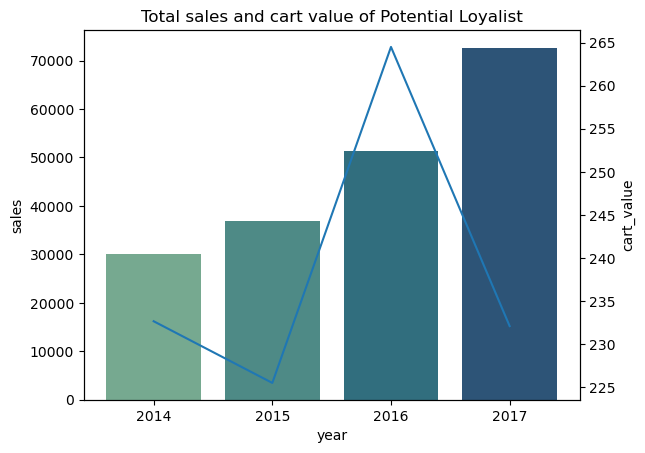

In [59]:
# Visualize sales and cart_value
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.barplot(data= p_ord, x='year',y= 'sales', palette='crest', ax=ax1)
sns.lineplot(data= p_ord, x='year',y= 'cart_value',ax=ax2)
plt.title('Total sales and cart value of Potential Loyalist')

***Comment:***
- The number of orders in general increased in the period 2014-2017, there was a decrease of 18.29% in 2016 but then increased by 61.34% in 2017, reaching 313 orders
- Revenue in the period 2014-2017 increased to 72641 dollars at a rate of 41.56% in 2017
- Although the number of orders and revenue increased sharply in 2017, the order value in 2017 decreased by 12.26%

=> Need to dive into 2016 and 2017 data

In [33]:
# Calculate orders count, sales and cart value by Category in 2016 and 2017
pcat= potential.groupby(['year','Category']).agg(ord_count=('Order ID','nunique'),
                               sales=('Sales','sum'))
pcat['cart_value']= pcat['sales']/pcat['ord_count']
pcat.sort_values(by=['Category','year'],inplace=True)
pcat = pcat.query('year=="2016" or year=="2017"').reset_index()


Text(0.5, 1.0, 'Cart value by Category of Potential Loyalist')

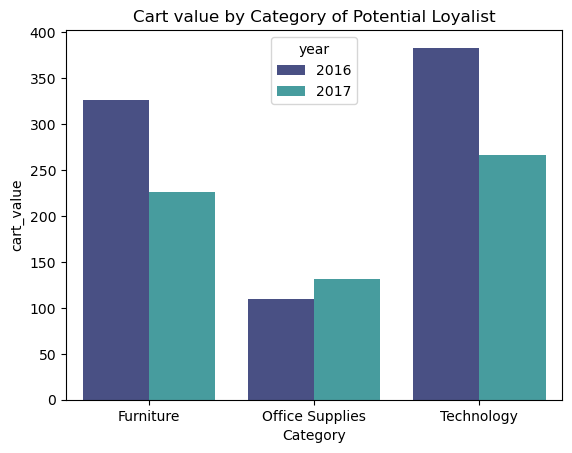

In [34]:
# Visualize cart_value by year by category
sns.barplot(data= pcat, x='Category',y='cart_value',hue='year', palette='mako')
plt.title('Cart value by Category of Potential Loyalist')

***Comment***

The cart_value decreased in 2 categories Furniture and Technology in 2017 despite the increase in the number of orders and the increase in revenue, specifically:

- Furniture group in 2017 increased the number of orders by 53% (from 62 to 95 orders) but the cart_value decreased by 18% (from 326 USD to 226 USD)
- Technology group in 2017 increased the number of orders 38% (from 40 to 74 orders) but the cart_value decreased by 31% (from 383 USD to 266 USD)

In [35]:
# Calculate orders count, sales and cart value by Channel in 2016 and 2017
pchan= potential.groupby(['year','Channel']).agg(ord_count=('Order ID','nunique'),
                               sales=('Sales','sum'))
pchan['cart_value']= pchan['sales']/pchan['ord_count']
pchan.sort_values(by=['Channel','year'],inplace=True)
pchan=pchan.query('year=="2016" or year=="2017"').reset_index()


Text(0.5, 1.0, 'Cart value by Channel of Potential Loyalist')

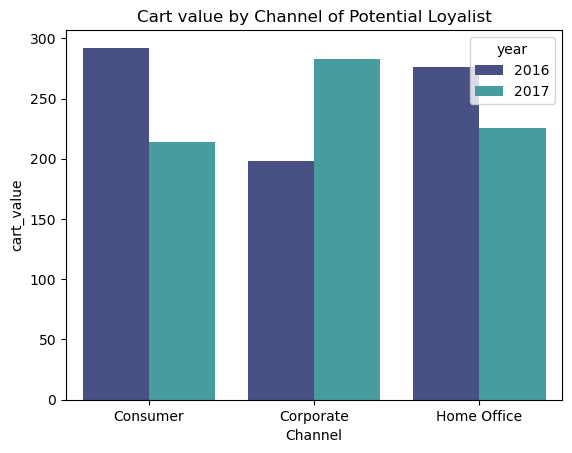

In [36]:
# Visualize cart_value by year by category
sns.barplot(data= pchan, x='Channel',y= 'cart_value',hue='year', palette='mako')
plt.title('Cart value by Channel of Potential Loyalist')

***Comment***

There is a change in the buying behavior of 2 channels Consumer and Home Office in 2017. They tend to place more orders but the value of each order is lower, specifically:

- Consumer group in 2017 increased orders by 40% (from 112 to 186 orders) but cart_value decreased by 26% (from 292 USD to 214 USD).
- Home Office in 2017 increased orders by 76% (from 30 to 53 orders) but cart_value decreased by 22% (from 276 USD to 225 USD)

In [37]:
# Calculate avg cart value of Potential Loyalist
p_cart_value = potential['Sales'].sum()/potential['Order ID'].nunique()
p_cart_value.round(2)

238.68

In [38]:
# Top 5 subcategory by orders count of Potential Loyalist
psub= potential.groupby('Sub-Category').agg({'Order ID':'count','Sales':'sum'}).reset_index()
psub.sort_values(by='Order ID',ascending=False,inplace=True)
psub.head(5)

,Sub-Category,Order ID,Sales
12,Paper,220,11769.054
3,Binders,219,16595.073
9,Furnishings,145,14315.404
14,Storage,121,20149.588
2,Art,111,5357.284


#### 3.2.1.b. Reccomendation for Potential Loyalist segment


- Special promotions are needed for customers that buy products in the same category and reach a cart_value above 238.68 USD (current average cart_value of this segment) to motivate customers to buy related products and increase the cart value.
- Offer membership/loyalty program, focusing on 2 channels Consumer and Home Office and 2 categories Furniture and Technology.
- Recommend to customers the best-selling Sub-category such as Paper, Binders, Furnishings, Storage and Art


### 3.2.2. At Risk

#### 3.2.2.a. Analysis and Insights

In [39]:
# Filter successful transactions of At Risk
risk =  data.query('segment=="At Risk" and Returned!="Yes"')
risk.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Category,Sub-Category,Returned,customer_id,segment,year
1542,5895,CA-2017-100825,2017-09-09,2017-09-14,Standard Class,KD-16495,Corporate,90036,OFF-ST-10003123,99.870,3,25.3004,Office Supplies,Storage,NaN,KD-16495,At Risk,2017
1543,6256,CA-2017-139444,2017-09-09,2017-09-15,Standard Class,GK-14620,Corporate,75023,OFF-LA-10000134,9.856,4,1.6016,Office Supplies,Labels,NaN,GK-14620,At Risk,2017
1553,3127,CA-2017-149895,2017-09-08,2017-09-12,Standard Class,EB-14110,Consumer,19134,TEC-PH-10002200,258.528,2,152.9624,Technology,Phones,NaN,EB-14110,At Risk,2017
1601,3513,CA-2017-140326,2017-09-04,2017-09-06,First Class,HW-14935,Corporate,60653,FUR-BO-10000112,825.174,9,104.7840,Furniture,Bookcases,NaN,HW-14935,At Risk,2017
1602,3514,CA-2017-140326,2017-09-04,2017-09-06,First Class,HW-14935,Corporate,60653,OFF-PA-10004041,17.760,3,4.0700,Office Supplies,Paper,NaN,HW-14935,At Risk,2017


In [40]:
# Calculate orders count, sales and cart value by year 
r_ord=risk.groupby('year').agg(ord_count=('Order ID','nunique'),
                               sales=('Sales','sum')).reset_index()

r_ord['cart_value']= r_ord['sales']/r_ord['ord_count']

r_ord['count_yoy']=r_ord['ord_count'].pct_change().round(4)*100
r_ord['sales_yoy']=r_ord['sales'].pct_change().round(4)*100
r_ord['cart_yoy']=r_ord['cart_value'].pct_change().round(4)*100
r_ord.sort_values(by='year',inplace=True)
r_ord

,year,ord_count,sales,cart_value,count_yoy,sales_yoy,cart_yoy
0,2014,155,99281.3381,640.524762,NaN,NaN,NaN
1,2015,196,91694.5870,467.829526,26.45,-7.64,-26.96
2,2016,194,114496.5370,590.188335,-1.02,24.87,26.15
3,2017,152,80524.4240,529.765947,-21.65,-29.67,-10.24


Text(0.5, 1.0, 'Total sales and cart value of At Risk segment')

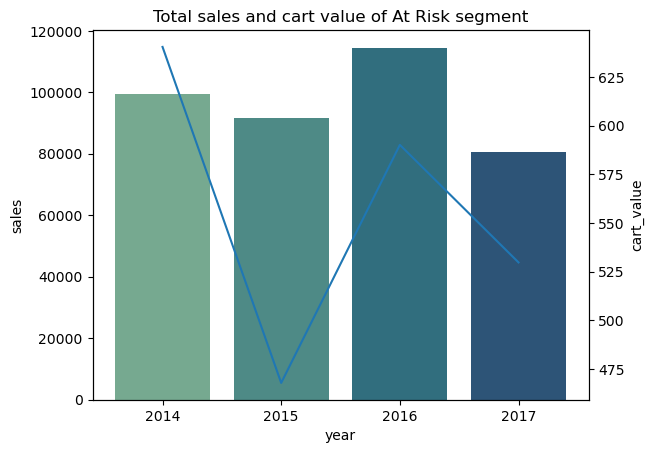

In [41]:
# Visualize sales and cart_value
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.barplot(data= r_ord, x='year',y= 'sales', palette='crest', ax=ax1)
sns.lineplot(data= r_ord, x='year',y= 'cart_value',ax=ax2)
plt.title('Total sales and cart value of At Risk segment')

***Comment***

In 2016, the number of orders decreased slightly (1.02%) but revenue and order value increased by 24.87% and 26.15% respectively. However, in 2017, there was a decline in all 3 indicators:
- The number of orders decreased by 21.65% to 152 orders
- Revenue down 29.67% to 80524 USD
- Order value reduced by 10.24% to 530 USD/order

=> Need to dive into 2016 and 2017 data

In [42]:
# Calculate orders count, sales and cart value by Category in 2016 and 2017
r_cat= risk.groupby(['year','Category']).agg(ord_count=('Order ID','nunique'),
                               sales=('Sales','sum'))
r_cat['cart_value']= r_cat['sales']/r_cat['ord_count']
r_cat.sort_values(by=['Category','year'],inplace=True)
r_cat = r_cat.query('year=="2016" or year=="2017"').reset_index()
r_cat

,year,Category,ord_count,sales,cart_value
0,2016,Furniture,78,27306.173,350.079141
1,2017,Furniture,51,24283.290,476.142941
2,2016,Office Supplies,141,37060.067,262.837355
3,2017,Office Supplies,107,21733.152,203.113570
4,2016,Technology,60,50130.297,835.504950
5,2017,Technology,53,34507.982,651.094000


Text(0.5, 1.0, 'Cart value by Category of At Risk segment')

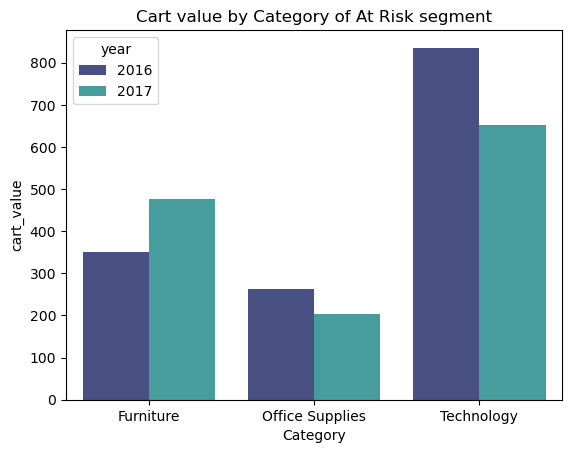

In [43]:
# Visualize cart_value by year by category
sns.barplot(data= r_cat, x='Category',y='cart_value',hue='year', palette='mako')
plt.title('Cart value by Category of At Risk segment')

***Comment***

In 2017, all 3 Categories showed a decrease in orders and revenue, 2 Categories Office Supplies and Technology experienced a decrease in cart value:

- Cart value of Office Supplies group in 2017 decreased by 23% (from 263 USD to 203 USD)
- Cart value of Technology group in 2017 decreased by 22% (from 836 USD to 651 USD)
- Meanwhile, the Furniture group has an increase in the cart value from 350 USD to 476 USD

In [44]:
# Calculate orders count, sales and cart value by Channel in 2016 and 2017
r_chan= risk.groupby(['year','Channel']).agg(ord_count=('Order ID','nunique'),
                               sales=('Sales','sum'))
r_chan['cart_value']= r_chan['sales']/r_chan['ord_count']
r_chan.sort_values(by=['Channel','year'],inplace=True)
r_chan = r_chan.query('year=="2016" or year=="2017"').reset_index()
r_chan

,year,Channel,ord_count,sales,cart_value
0,2016,Consumer,90,52110.999,579.011100
1,2017,Consumer,75,27895.952,371.946027
2,2016,Corporate,68,47553.771,699.320162
3,2017,Corporate,50,33334.159,666.683180
4,2016,Home Office,36,14831.767,411.993528
5,2017,Home Office,27,19294.313,714.604185


Text(0.5, 1.0, 'Cart value by Channel of At Risk segment')

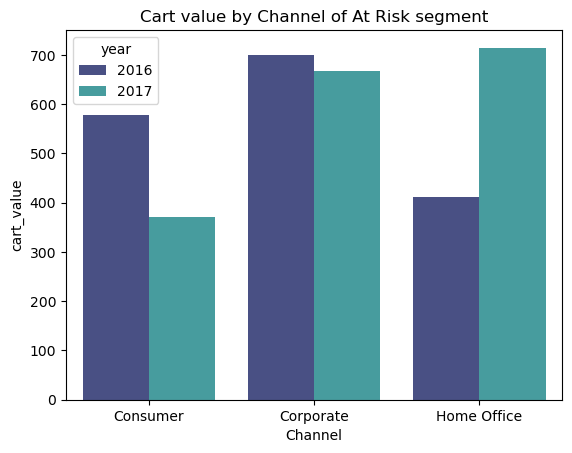

In [45]:
# Visualize cart_value by year by channel
sns.barplot(data= r_chan, x='Channel',y='cart_value',hue='year', palette='mako')
plt.title('Cart value by Channel of At Risk segment')

***Comment***

In 2017, while the Consumer and Corporate channels experienced a decrease in the number of orders, revenue and cart value, the Home Office channel, despite a decrease in the number of orders, still recorded an increase in revenue and cart value:

- Consumer group reduced the number of orders by 17% and cart value by 38%
- Corporate group reduced the number of orders by 26% and cart value by 5%
- Office reduced the number of orders by 25% but cart value increased by 73%

In [46]:
# Top 5 subcategory by orders count of At Risk
rsub= risk.groupby('Sub-Category').agg(ord_count=('Order ID','nunique'),
                               sales=('Sales','sum'))
rsub['cart_value']= rsub['sales']/rsub['ord_count']
rsub.sort_values(by='ord_count',ascending=False,inplace=True)
rsub.head(5)

,ord_count,sales,cart_value
Sub-Category,,,
Binders,169,37163.381,219.901663
Paper,162,11273.090,69.586975
Furnishings,123,12298.648,99.989008
Phones,120,44957.068,374.642233
Storage,110,36276.012,329.781927


In [47]:
# Calculate orders count by Ship Mode
rship= risk.groupby('Ship Mode').agg(ord_count=('Order ID','nunique')).reset_index()
rship.sort_values(by='ord_count',ascending=False,inplace=True)
rship

,Ship Mode,ord_count
3,Standard Class,420
2,Second Class,131
0,First Class,107
1,Same Day,39


***Comment***

Orders in the At Risk segment mainly use Standard Class shipping packages, accounting for 60%

In [48]:
# Filter returned orders of At Risk
risk_return = data.query('segment=="At Risk" and Returned=="Yes"')
risk_return.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Category,Sub-Category,Returned,customer_id,segment,year
146,1114,CA-2017-140585,2017-12-18,2017-12-23,Second Class,RA-19915,Consumer,92024,OFF-BI-10003364,46.672,2,15.1684,Office Supplies,Binders,Yes,RA-19915,At Risk,2017
147,1115,CA-2017-140585,2017-12-18,2017-12-23,Second Class,RA-19915,Consumer,92024,FUR-BO-10002206,119.833,1,132.5212,Furniture,Bookcases,Yes,RA-19915,At Risk,2017
148,1116,CA-2017-140585,2017-12-18,2017-12-23,Second Class,RA-19915,Consumer,92024,TEC-AC-10003610,119.980,2,31.1948,Technology,Accessories,Yes,RA-19915,At Risk,2017
425,9727,CA-2017-167395,2017-12-02,2017-12-04,First Class,KM-16720,Consumer,1852,OFF-AP-10001293,286.860,7,29.5056,Office Supplies,Appliances,Yes,KM-16720,At Risk,2017
426,9728,CA-2017-167395,2017-12-02,2017-12-04,First Class,KM-16720,Consumer,1852,TEC-PH-10004977,979.950,5,139.1529,Technology,Phones,Yes,KM-16720,At Risk,2017


In [49]:
# Calculate returned orders count by category
cat_return= risk_return.groupby('Category').agg(ord_count=('Order ID','nunique'),
                               sales=('Sales','sum'))
cat_return['cart_value']= cat_return['sales']/cat_return['ord_count']
cat_return.sort_values(by='ord_count',ascending=False,inplace=True)
cat_return

,ord_count,sales,cart_value
Category,,,
Office Supplies,34,10397.360,305.804706
Technology,22,14793.848,672.447636
Furniture,15,8924.359,594.957267


***Comment***

- Office Supplies and Technology have 34 and 22 returned orders, respectively. These are also the two groups that have negative status in the number of orders, revenue and cart value in 2017 (as analyzed above).
- The Furniture group has the lowest number of returned orders (15 orders). This is the group with the highest order value in 2017

=> The number of returned orders could be related to the decrease of cart_value

In [50]:
# Calculate returned orders count by channel
chan_return= risk_return.groupby('Channel').agg(ord_count=('Order ID','nunique'),
                               sales=('Sales','sum'))
chan_return['cart_value']= chan_return['sales']/chan_return['ord_count']
chan_return.sort_values(by='ord_count',ascending=False,inplace=True)
chan_return

,ord_count,sales,cart_value
Channel,,,
Consumer,19,18072.580,951.188421
Corporate,16,12466.414,779.150875
Home Office,8,3576.573,447.071625


***Comment***

- Consumer and Corporate have 19 and 16 returned orders respectively. These are also the two groups that experienced a decrease in the number of orders, revenue and order value in 2017 (as analyzed above).
- Furniture group has the lowest number of returned orders (8 orders). It is the only group with an increase in order value in 2017

=> The number of returned orders could be related to the decrease of cart_value

#### 3.2.2.b. Recommendations for At Risk segment

- Channels and Categories with a high number of return orders all have a decrease in the number of orders, revenue and cart value => Need to do a deeper analysis of the correlation between these factors
- Start a new program (exchange points/gifts/vouchers) for customers in these groups to get them to do a survey to find out the main reason why these customers have not come back for a long time.
- Since nearly 60% of orders use Ship mode Standard Class, the free upgrade to Second Class policy can be included in the new campaign
- Send personalized emails to provide useful information and recommend to customers about best-selling Sub-category such as Binders, Paper, Furnishings, Phones and Storage